## Preprocessing

In [10]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
# import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [11]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

In [12]:
# Determine the number of unique values in each column.
n = application_df.nunique(axis=0)
n

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

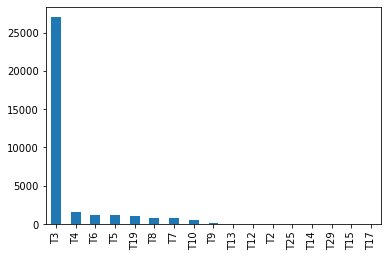

In [13]:
# histogram
# hist = application_df.hist(column='APPLICATION_TYPE')
application_df['APPLICATION_TYPE'].value_counts().plot(kind='bar')

In [14]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(['T13', 'T12', 'T2','T25','T14','T29','T15','T17'], 'Other')

In [15]:
application_df['APPLICATION_TYPE']

0        T10
1         T3
2         T5
3         T3
4         T3
        ... 
34294     T4
34295     T4
34296     T3
34297     T5
34298     T3
Name: APPLICATION_TYPE, Length: 34299, dtype: object

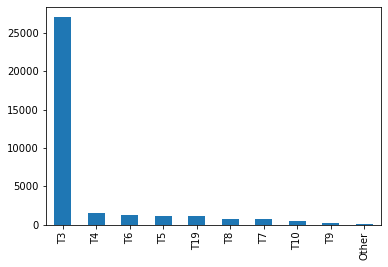

In [16]:
# histogram
application_df['APPLICATION_TYPE'].value_counts().plot(kind='bar')

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE

# # Replace in dataframe
# for app in application_types_to_replace:
#     application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# # Check to make sure binning was successful
# application_df['APPLICATION_TYPE'].value_counts()

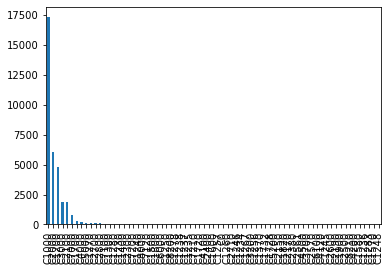

In [17]:
# Look at CLASSIFICATION value counts for binning
# histogram
application_df['CLASSIFICATION'].value_counts().plot(kind='bar')

In [22]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_n = application_df['CLASSIFICATION'].value_counts()
#select n greater than 1
classification_n[classification_n > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1278       10
C1238       10
C1237        9
C1235        9
C7210        7
C1720        6
C4100        6
C2400        6
C1600        5
C1257        5
C0           3
C1260        3
C2710        3
C1246        2
C1234        2
C1267        2
C3200        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [27]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
classifications_to_replace = classification_n[classification_n <= 20]
classifications_to_replace.index


# # Replace in dataframe
# for cls in classifications_to_replace:
#     application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# # Check to make sure binning was successful
# application_df['CLASSIFICATION'].value_counts()

Index(['C8000', 'C7120', 'C1500', 'C1800', 'C6000', 'C1250', 'C8200', 'C1278',
       'C1238', 'C1237', 'C1235', 'C7210', 'C1720', 'C4100', 'C2400', 'C1600',
       'C1257', 'C0', 'C1260', 'C2710', 'C1246', 'C1234', 'C1267', 'C3200',
       'C1256', 'C1370', 'C1732', 'C1728', 'C5200', 'C2150', 'C1820', 'C2170',
       'C2380', 'C2561', 'C4500', 'C3700', 'C2570', 'C6100', 'C4120', 'C1245',
       'C2600', 'C2190', 'C1900', 'C2500', 'C8210', 'C4200', 'C1580', 'C1236',
       'C1283', 'C1570', 'C1248'],
      dtype='object')

In [29]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(classifications_to_replace.index, 'Other')

In [30]:
# # Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
Other      227
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: CLASSIFICATION, dtype: int64

In [31]:
application_df

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0                  T10       Independent          C1000    ProductDev   
1                   T3       Independent          C2000  Preservation   
2                   T5  CompanySponsored          C3000    ProductDev   
3                   T3  CompanySponsored          C2000  Preservation   
4                   T3       Independent          C1000     Heathcare   
...                ...               ...            ...           ...   
34294               T4       Independent          C1000    ProductDev   
34295               T4  CompanySponsored          C3000    ProductDev   
34296               T3  CompanySponsored          C2000  Preservation   
34297               T5       Independent          C3000    ProductDev   
34298               T3       Independent          C1000  Preservation   

       ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS   ASK_AMT  \
0       Association       1              0                      N      5000   
1      Co-operative       1         1-9999                      N    108590   
2       Association       1              0                      N      5000   
3             Trust       1    10000-24999                      N      6692   
4             Trust       1  100000-499999                      N    142590   
...             ...     ...            ...                    ...       ...   
34294   Association       1              0                      N      5000   
34295   Association       1              0                      N      5000   
34296   Association       1              0                      N      5000   
34297   Association       1              0                      N      5000   
34298  Co-operative       1          1M-5M                      N  36500179   

       IS_SUCCESSFUL  
0                  1  
1                  1  
2                  0  
3                  1  
4                  1  
...              ...  
34294              0  
34295              0  
34296              0  
34297              1  
34298              0  

[34299 rows x 10 columns]

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
pandas.get_dummies(data

In [ ]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

# Second hidden layer
#  YOUR CODE GOES HERE

# Output layer
#  YOUR CODE GOES HERE

# Check the structure of the model
nn.summary()

In [ ]:
# Compile the model
#  YOUR CODE GOES HERE

In [ ]:
# Train the model
#  YOUR CODE GOES HERE

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE